**Linking the Google Drive**

In [38]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the Important Libraries**

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset**

In [40]:
df=pd.read_csv("/content/drive/MyDrive/engine_data.csv")
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [41]:
df.tail()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1
19534,504,3.775246,3.962480,2.038647,75.564313,80.421421,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [43]:
df.isnull().sum()

,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


<Axes: >

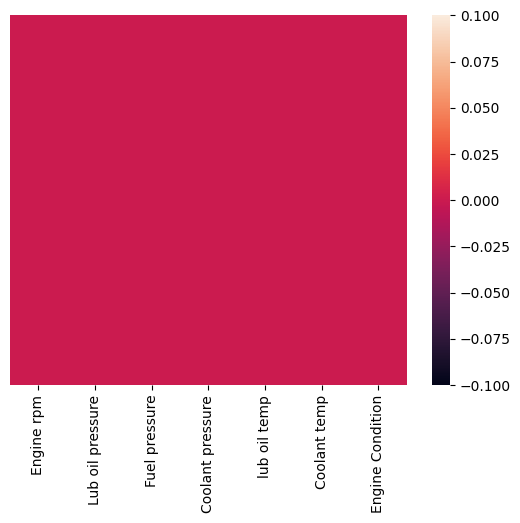

In [44]:
sns.heatmap(df.isnull(),yticklabels=False)

In [45]:
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


**DATA CLEANING AND REMOVING OUTLIERS**

In [46]:
df = df.drop(df[df["Coolant temp"]> 110].index)
df = df.drop(df[df["Fuel pressure"]> 19].index)
df = df.drop(df[df["Engine rpm"]< 275].index)
df = df.drop(df[df["Engine rpm"]> 2000].index)

**DATA VISUALIZATIONS**

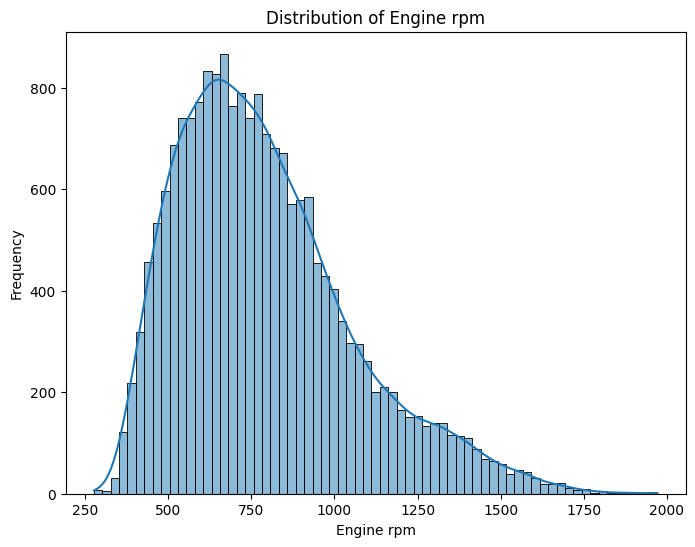

In [47]:
#ploting the histogram of the engine RPM frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['Engine rpm'], kde=True)
plt.title('Distribution of Engine rpm')
plt.xlabel('Engine rpm')
plt.ylabel('Frequency')
plt.show()

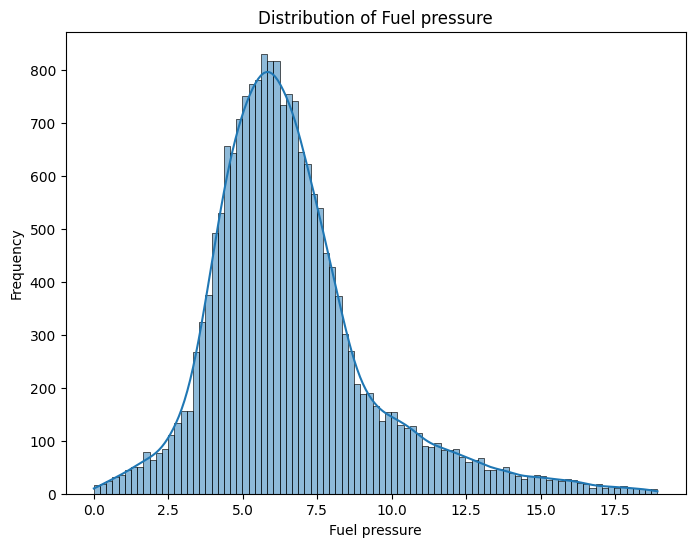

In [48]:
#ploting the histogram of the Fuel pressure frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['Fuel pressure'], kde=True)
plt.title('Distribution of Fuel pressure')
plt.xlabel('Fuel pressure')
plt.ylabel('Frequency')
plt.show()

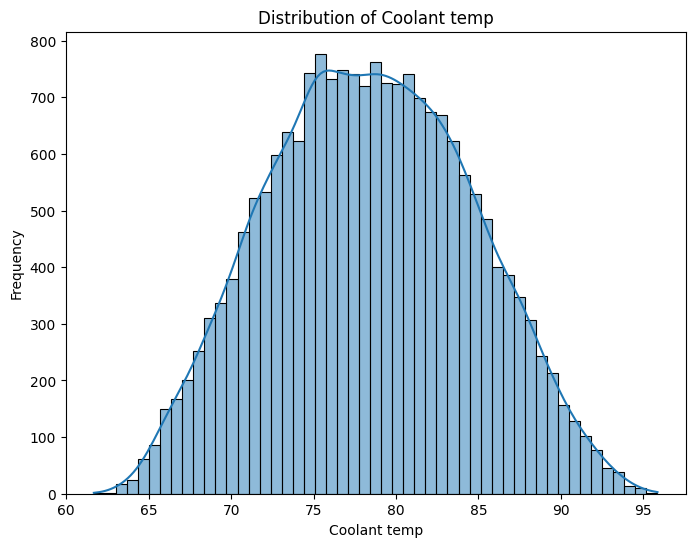

In [49]:
#ploting the histogram of the Collant temprature frequency
plt.figure(figsize=(8, 6))
sns.histplot(df['Coolant temp'], kde=True)
plt.title('Distribution of Coolant temp')
plt.xlabel('Coolant temp')
plt.ylabel('Frequency')
plt.show()

<ipython-input-50-599da4c5dd23>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'Fuel pressure V/S Engine Condition'}, xlabel='Fuel pressure', ylabel='Engine Condition'>

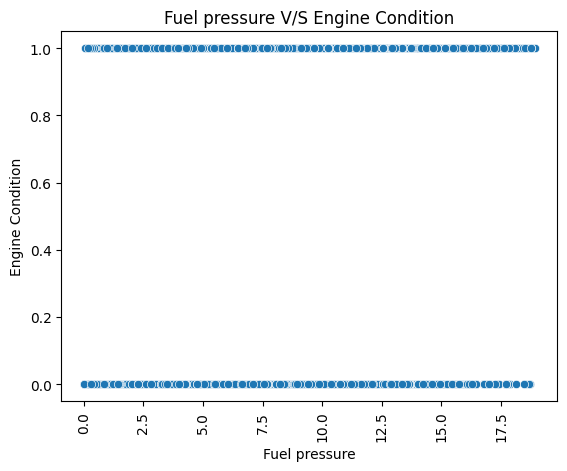

In [50]:
#Ploting the Scatter Graph of Fuel pressure V/S Engine Condition
my_plot=sns.scatterplot(x="Fuel pressure",y="Engine Condition",data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('Fuel pressure V/S Engine Condition')
my_plot

<ipython-input-51-fd11a525c694>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'lub oil temp V/S Engine rpm'}, xlabel='Engine rpm', ylabel='lub oil temp'>

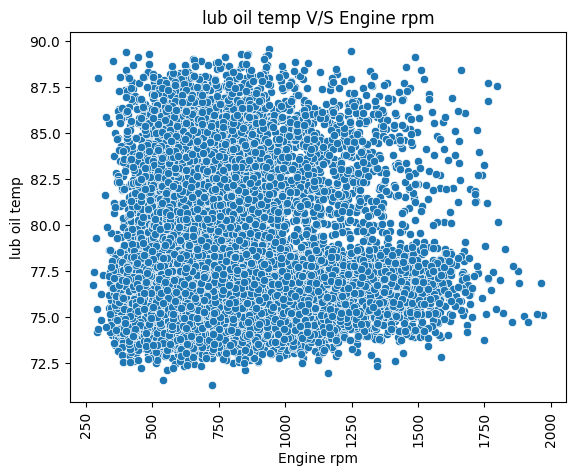

In [51]:
#Ploting the Scatter Graph of lub oil temp V/S Engine rpm
my_plot=sns.scatterplot(x="Engine rpm",y="lub oil temp",data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('lub oil temp V/S Engine rpm')
my_plot

<ipython-input-52-5cddcca07432>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'Engine rpm V/S Coolant temp'}, xlabel='Engine rpm', ylabel='Coolant temp'>

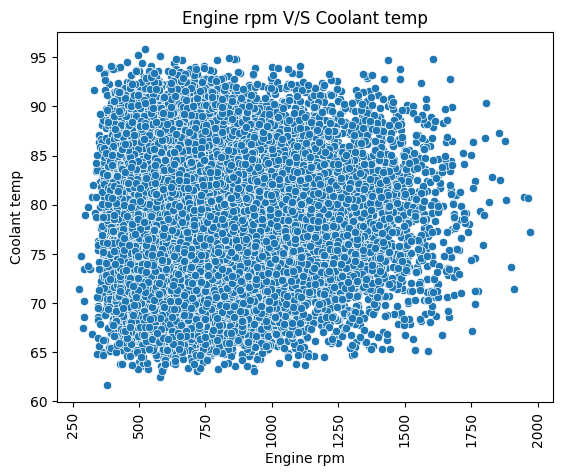

In [52]:
#Ploting the Scatter Graph of Engine rpm V/S Coolant temp
my_plot=sns.scatterplot(x="Engine rpm",y="Coolant temp",data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('Engine rpm V/S Coolant temp')
my_plot

<ipython-input-53-c082c8e41b9e>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'Engine RPM VS Fuel Pressure with respect to Engine Condition'}, xlabel='Engine rpm', ylabel='Fuel pressure'>

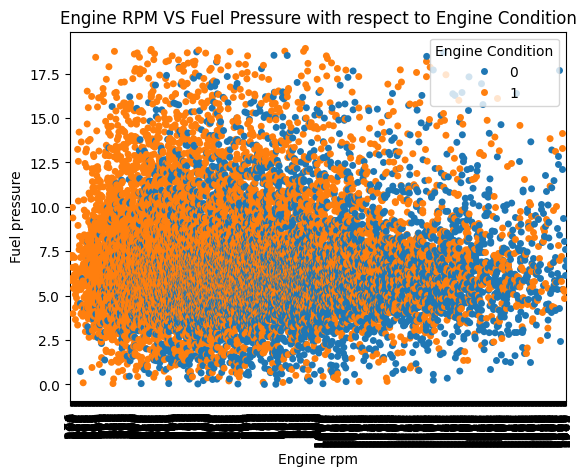

In [53]:
#Ploting the Stripplot of Engine RPM VS Fuel Pressure with respect to Engine Condition
my_plot=sns.stripplot(x="Engine rpm",y="Fuel pressure",data=df,hue="Engine Condition",dodge=True)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('Engine RPM VS Fuel Pressure with respect to Engine Condition')
my_plot

<ipython-input-54-08624fbf4598>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'Engine RPM VS Coolant pressure with respect to Engine Condition'}, xlabel='Engine rpm', ylabel='Coolant pressure'>

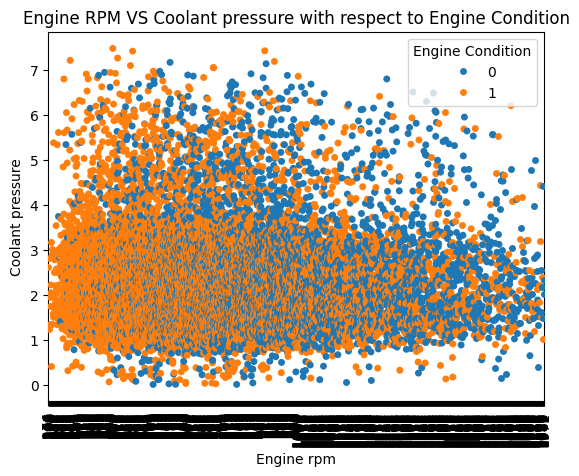

In [54]:
#Ploting the Stripplot of Engine RPM VS Coolant pressure with respect to Engine Condition
my_plot=sns.stripplot(x="Engine rpm",y="Coolant pressure",data=df,hue="Engine Condition",dodge=True)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('Engine RPM VS Coolant pressure with respect to Engine Condition')
my_plot

<ipython-input-55-52c4f62bbe38>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


<Axes: title={'center': 'Engine RPM VS Lub oil pressure with respect to Engine Condition'}, xlabel='Engine rpm', ylabel='Lub oil pressure'>

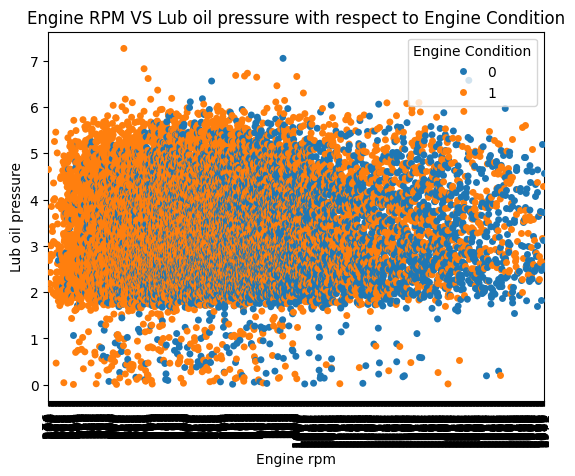

In [55]:
#Ploting the Stripplot of Engine RPM VS Lub oil pressure with respect to Engine Condition
my_plot=sns.stripplot(x="Engine rpm",y="Lub oil pressure",data=df,hue="Engine Condition",dodge=True)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot.set_title('Engine RPM VS Lub oil pressure with respect to Engine Condition')
my_plot

**Checking the Correlation between the Features**

<Axes: >

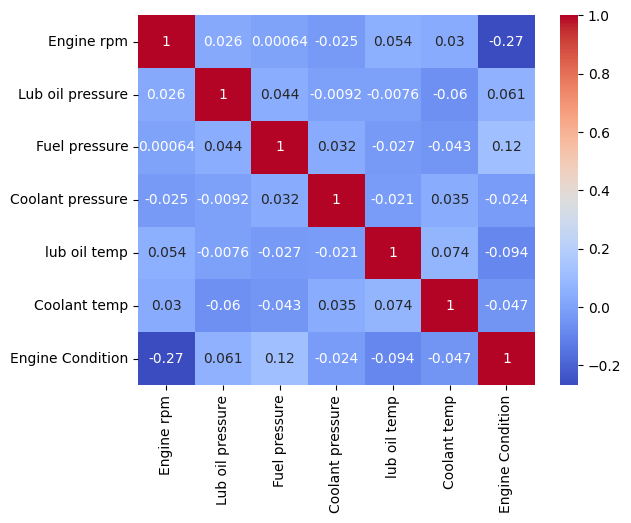

In [56]:
my_plot=sns.heatmap(df.select_dtypes(["number"]).corr(),annot=True,cmap="coolwarm")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)
my_plot

In [57]:
# to find the feautures which is directly correlating each other
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

**DATA PREPRATION**

In [58]:
y=df["Engine Condition"]
X=df.select_dtypes(["number"])
X=X.drop(columns="Engine Condition")
X

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
0,700,2.493592,11.790927,3.178981,84.144163,81.632187
1,876,2.941606,16.193866,2.464504,77.640934,82.445724
2,520,2.961746,6.553147,1.064347,77.752266,79.645777
4,619,5.672919,15.738871,2.052251,78.396989,87.000225
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818
...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396


**DATA PREPROCESSING**

In [59]:
corr_features=correlation(X,0.05)
len(set(corr_features))
corr_features # this list of features can reduce the accuracy of the training model

{'Coolant temp', 'lub oil temp'}

In [60]:
#X=X.drop(corr_features,axis=1)

**SPLITTING DATASET**

In [61]:
#importing the train_test_split to split the dataset into two part one is train part to train model and another is test part for testing the model
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test , y_train ,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
X_train

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
6158,925,2.820947,7.228921,6.498746,82.839991,80.626363
7815,488,4.240642,8.059480,3.117563,74.138471,75.598129
10678,811,4.498407,3.794645,1.580223,81.250897,86.607791
10635,825,4.703145,6.014042,2.954555,77.412422,82.406240
8933,1075,4.097170,6.806645,2.071486,77.524373,74.463621
...,...,...,...,...,...,...
11313,481,2.093973,12.963321,2.087893,76.250706,79.194086
11995,397,5.259933,3.549574,0.947752,76.860190,82.354471
5407,995,4.378302,5.114389,1.454776,83.660425,74.818988
862,657,2.994992,4.178793,2.479320,77.226404,78.190482


**SCALERIZATION OF DATA**

In [63]:
# importing StandardScaler to scale the data set value in the range of 0 to 1 with all feature value comparisons
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**REGRESSION MODEL**

In [64]:
# Using the Ridge Regression Model to train the dataset for Prediction of Engine Conditions
from sklearn.linear_model import Ridge
rm = Ridge()
rm.fit(X_train_scaled, y_train)
Ridge_s=rm.score(X_test_scaled,y_test)

In [65]:
# Using the AdaBoostRegressor Regression Model to train the dataset for Prediction of Engine Conditions
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb_model = adb.fit(X_train_scaled,y_train)
AdaBoostRegressor_s=adb_model.score(X_test_scaled,y_test)

In [66]:
# Using the LinearRegression Model to train the dataset for Prediction of Engine Conditions
from sklearn.linear_model import LinearRegression
gb_clf = LinearRegression()
gb_clf.fit(X_train_scaled, y_train)
LinearRegression_s=gb_clf.score(X_test_scaled, y_test)

In [67]:
data = [['Ridge', Ridge_s], ['AdaBoostRegressor', AdaBoostRegressor_s], ['LinearRegression', LinearRegression_s]]
# Create the pandas DataFrame
df1 = pd.DataFrame(data, columns=['Model', 'Score'])
df1

,Model,Score
0,Ridge,0.109910
1,AdaBoostRegressor,0.106234
2,LinearRegression,0.109910


**Regression Model Comparision**

<ipython-input-68-8097d76335ae>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=20)


<Axes: xlabel='Model', ylabel='Score'>

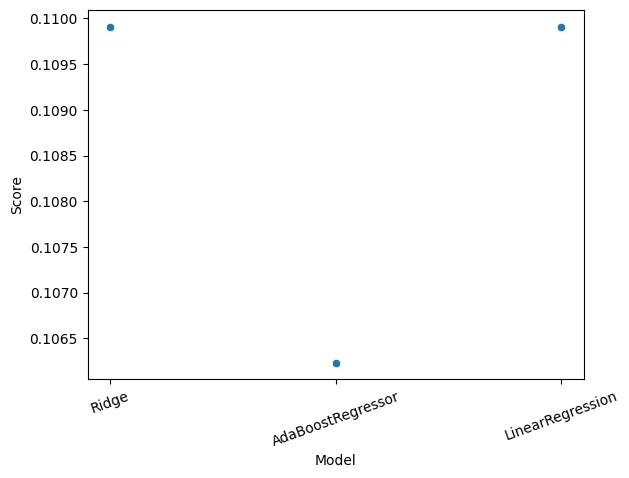

In [68]:
my_plot=sns.scatterplot(x="Model",y="Score",data=df1)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=20)
my_plot

**CLASSIFIER MODELS**

In [69]:
# Using the AdaBoostClassifier Model to train the dataset for Prediction of Engine Conditions
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train_scaled,y_train)
AdaBoostClassifier_s=adb_model.score(X_test_scaled,y_test)

In [70]:
# Using the GradientBoostingClassifier Model to train the dataset for Prediction of Engine Conditions
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, random_state=0)
gb_clf.fit(X_train, y_train)
GradientBoostingClassifier_s=gb_clf.score(X_test_scaled,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [71]:
# Using the DecisionTreeClassifier Model to train the dataset for Prediction of Engine Conditions
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=2)
clf_gini.fit(X_train, y_train)
DecisionTreeClassifier_s=clf_gini.score(X_test_scaled,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:
# Using the SVC Model to train the dataset for Prediction of Engine Conditions
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)
SVC_s=clf.score(X_test_scaled,y_test)

In [73]:
data = [['AdaBoostClassifier', AdaBoostClassifier_s], ['GradientBoostingClassifier', GradientBoostingClassifier_s], ['DecisionTreeClassifier', DecisionTreeClassifier_s],['SVC', SVC_s]]
# Create the pandas DataFrame
df2 = pd.DataFrame(data, columns=['Model', 'Score'])
df2

,Model,Score
0,AdaBoostClassifier,0.666325
1,GradientBoostingClassifier,0.378815
2,DecisionTreeClassifier,0.628879
3,SVC,0.653244


**Classifier Model Comparision**

<ipython-input-74-4cbb2071a8f2>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=20)


<Axes: xlabel='Model', ylabel='Score'>

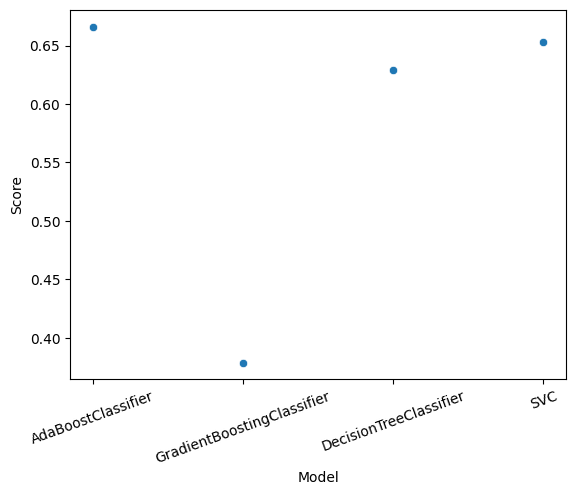

In [74]:
my_plot=sns.scatterplot(x="Model",y="Score",data=df2)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=20)
my_plot